<a href="https://colab.research.google.com/github/samsomsabu/COMPUTER-VISION-/blob/main/2348549_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Median Spatial Domain Filtering


import cv2
import numpy as np


# Read the image
img_noisy1 = cv2.imread('/content/noisysalterpepper.png', 0)

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]

		temp = sorted(temp)
		img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.png', img_new1)


True

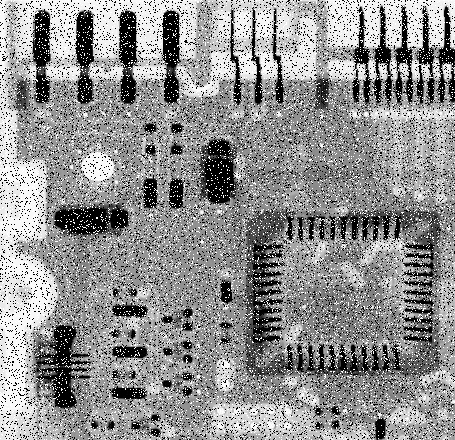

In [2]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_noisy1)

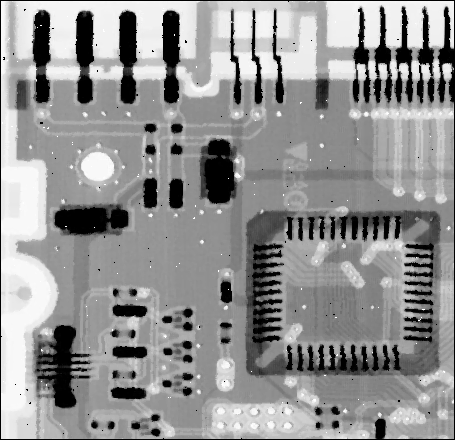

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_new1)

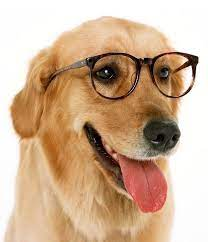

In [4]:
max_min_filter_img=cv2.imread('/content/download (1).jpg', )
from google.colab.patches import cv2_imshow
cv2_imshow(max_min_filter_img)

In [9]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from IPython.display import display
img = Image.open("/content/download (1).jpg")

filter_size = 3

min_img = img.filter(ImageFilter.MinFilter(size=filter_size))

min_img.save("min_img.png")

max_img = img.filter(ImageFilter.MaxFilter(size=filter_size))

max_img.save("max_img.png")


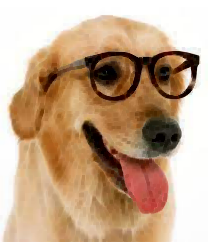

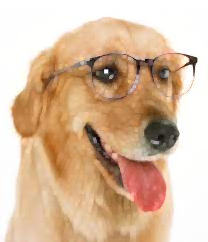

In [10]:
image_max = Image.open('/content/max_img.png')
image_min = Image.open("/content/min_img.png")
display(image_min)
display(image_max)



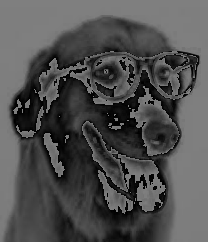

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_path = '/content/download (1).jpg'
image = cv2.imread(image_path, 0)  # Read the image in grayscale mode
from scipy.ndimage import maximum_filter, minimum_filter

def midpoint(img):
    maxf = maximum_filter(img, (3, 3))
    minf = minimum_filter(img, (3, 3))
    midpoint = (maxf + minf) / 2
    cv2_imshow(midpoint)

midpoint(image)

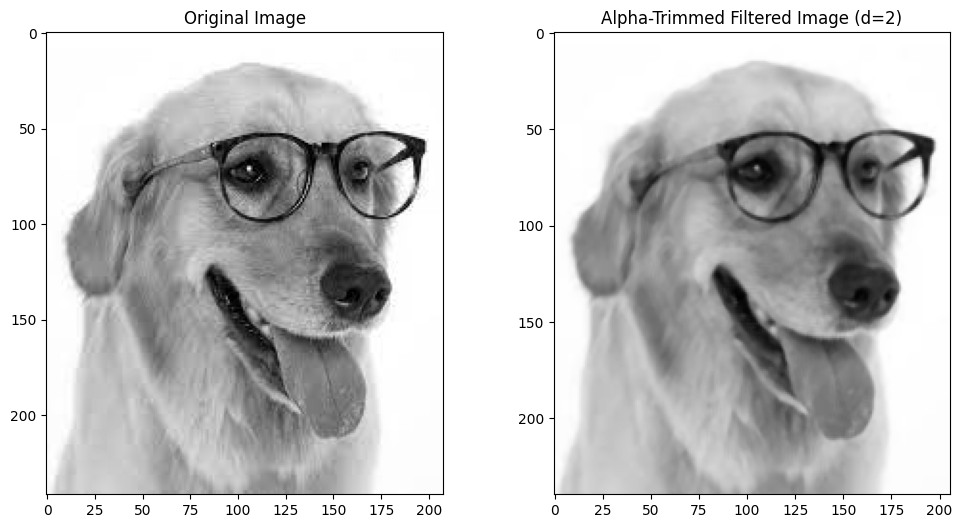

In [15]:
def alpha_trimmed_filter(image, filter_size, d):
    pad = filter_size // 2
    result = np.zeros((image.shape[0] - 2 * pad, image.shape[1] - 2 * pad), np.uint8)

    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            window = image[i-pad:i+pad+1, j-pad:j+pad+1]
            sorted_pixels = np.sort(window.flatten())
            trimmed_pixels = sorted_pixels[d:-d]
            result[i-pad, j-pad] = np.mean(trimmed_pixels)

    return result
_d = 2  # Set the parameter d based on the amount of noise to be removed
_image = alpha_trimmed_filter(image, 3, _d)  # Adjust the filter_size as needed

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(_image, cmap='gray'), plt.title(f'Alpha-Trimmed Filtered Image (d={_d})')
plt.show()
